## Linear Regression on Insurances data set

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

In [2]:
mydata=pd.read_csv(r"C:\Users\Dell\Desktop\ML-programing\dataset\DataSets-master\DataSets-master\insurance.csv")

In [3]:
mydata

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [4]:
mydata.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
mydata.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


#### Data Visualization

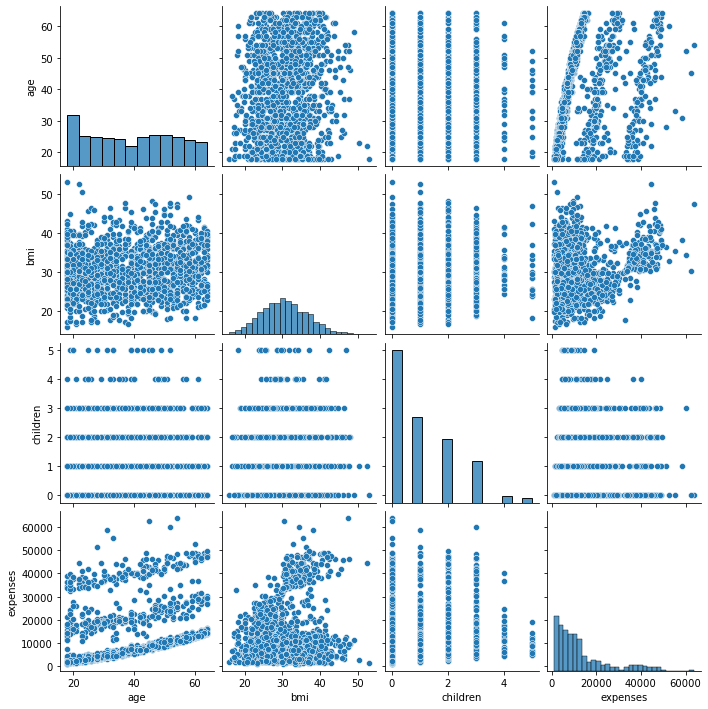

In [7]:
sb.pairplot(mydata)
plt.show()

In [8]:
mydata.corr().T

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

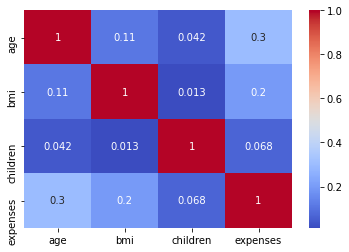

In [9]:
#plt.figure(figsize=(10,10))
sb.heatmap(mydata.corr(),annot=True,cmap="coolwarm")
plt.show

#### Model AGE and Expenses

In [10]:
mydata.keys()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [11]:
x_age=mydata[["age"]]

In [12]:
x_age

,age
0,19
1,18
2,28
3,33
4,32
...,...
1333,50
1334,18
1335,18
1336,21


In [13]:
y_expenses=mydata[['expenses']]

In [14]:
y_expenses

,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86
...,...
1333,10600.55
1334,2205.98
1335,1629.83
1336,2007.95


#### Coverting age and expenses into array

In [15]:
XA=x_age.values

In [16]:
XA

array([[19],
       [18],
       [28],
       ...,
       [18],
       [21],
       [61]], dtype=int64)

In [17]:
YA=y_expenses.values

In [18]:
YA

array([[16884.92],
       [ 1725.55],
       [ 4449.46],
       ...,
       [ 1629.83],
       [ 2007.95],
       [29141.36]])

In [19]:
Mean1=XA.mean()
Std1=XA.std()
print("Mean1={} and Std1={}".format(Mean1,Std1))

Mean1=39.20702541106129 and Std1=14.044709038954522


In [20]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [22]:
XA=StandardScaler().fit(XA).transform(XA.astype(float))

In [23]:
XA

array([[-1.43876426],
       [-1.50996545],
       [-0.79795355],
       ...,
       [-1.50996545],
       [-1.29636188],
       [ 1.55168573]])

In [24]:
Mean2=int(XA.mean())
std2=XA.std()
print("Aftr scalling mean {} and std {}".format(Mean2,std2))

Aftr scalling mean 0 and std 1.0000000000000002


#### Splitting data into test data and training data

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(XA,YA,test_size=.30,random_state=101)

In [28]:
print("XArr shape",XA.shape)
print("Xtrain shape",Xtrain.shape)
print("Xtest shape",Xtest.shape)
print("YArr shape",YA.shape)
print("Ytrain shape",Ytrain.shape)
print("Ytest shape",Ytest.shape)

XArr shape (1338, 1)
Xtrain shape (936, 1)
Xtest shape (402, 1)
YArr shape (1338, 1)
Ytrain shape (936, 1)
Ytest shape (402, 1)


#### Training model

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error

In [30]:
lr_model=LinearRegression(fit_intercept=True)
lr_learner=lr_model.fit(Xtrain,Ytrain)

In [31]:
lr_model.predict([Xtest[20]])

array([[12454.67728182]])

In [32]:
Ytest[0]

array([6079.67])

In [33]:
Ypre=lr_learner.predict(Xtest)
Yact=Ytest

In [34]:
pd.DataFrame({"Yact":list(Ytest),"yp":list(Ypre)})

,Yact,yp
0,[6079.67],[13213.488085956467]
1,[2457.21],[8660.623261112616]
2,[25517.11],[17260.479041373226]
3,[34439.86],[8407.686326399069]
4,[6985.51],[12960.55115124292]
...,...,...
397,[18033.97],[9419.43406525326]
398,[7729.65],[14225.235824810658]
399,[30942.19],[19031.037584368056]
400,[3176.29],[10178.2448693939]


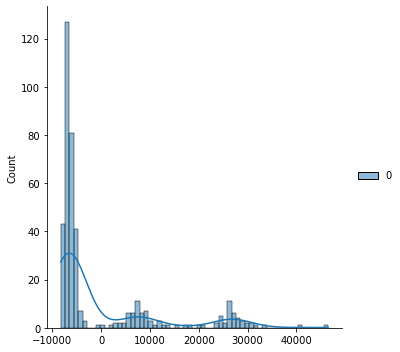

In [35]:
sb.displot(Yact-Ypre,kind='hist',kde=True)
plt.show()

In [36]:
#score
error=mean_squared_error(Yact,Ypre)
print(error)

126660448.83836518


In [37]:
c=lr_learner.intercept_
m=lr_learner.coef_
print("m{} and c {}".format(m,c))

m[[3552.42565326]] and c [13518.78939355]


In [38]:
Ypeq=Xtest*m+c

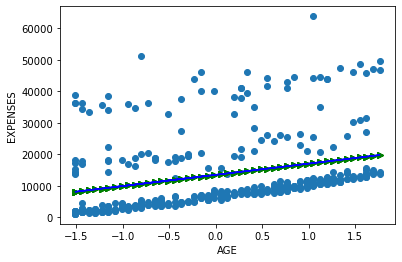

In [40]:
plt.scatter(Xtest,Ytest)
plt.plot(Xtest,Ypre,"g>")
plt.plot(Xtest,Ypre,"b")
plt.xlabel("AGE")
plt.ylabel("EXPENSES")
plt.show()